# Forward Curve Consistency Check

Load curve data from "eurusd_fwd_curve.csv"

In [12]:
from datetime import date
import pandas as pd

from ipywidgets import widgets
from IPython.display import display

import qgrid
%matplotlib inline

spreadMultiplier = 2
spotDate = date(2019, 2, 25)

def setSpreadMultiplier(x):
    spreadMultiplier = x
    
eurusd_fwd_curve = pd.read_csv("eurusd_fwd_curve.csv")

# print(eurusd_fwd_curve.head())
eurusd_fwd_curve_widget = qgrid.show_grid(eurusd_fwd_curve, show_toolbar=True)

#eurusd_fwd_curve_widget
eurusd_fwd_curve

,Tenor,Date1,Date2,Days,LHS,RHS
0,ON,21-Feb-19,22-Feb-19,-4,0.900,0.920
1,TN,22-Feb-19,25-Feb-19,-3,2.745,2.765
2,SN,25-Feb-19,26-Feb-19,1,0.900,0.940
3,1W,25-Feb-19,4-Mar-19,7,6.390,6.490
4,2W,25-Feb-19,11-Mar-19,14,12.890,12.990
5,3W,25-Feb-19,18-Mar-19,21,19.435,19.535
6,IMM1,25-Feb-19,20-Mar-19,23,21.280,21.480
7,1M,25-Feb-19,25-Mar-19,28,25.995,26.145
8,2M,25-Feb-19,25-Apr-19,59,56.725,56.925
9,3M,25-Feb-19,28-May-19,92,87.970,88.270


## Calcuate Mid Price. (LHS + RHS)*0.5


In [2]:
eurusd_fwd_curve['MID'] = (eurusd_fwd_curve['LHS'] + eurusd_fwd_curve['RHS']) * 0.5


## Calculate Half Spread. (RHS - LHS)*0.5


In [3]:
eurusd_fwd_curve['Half Spread'] = (eurusd_fwd_curve['RHS'] - eurusd_fwd_curve['LHS']) * 0.5

## Calculate Final Spread. 


In [4]:
eurusd_fwd_curve['Final Spread'] = eurusd_fwd_curve['Half Spread'] * spreadMultiplier

## Render Data frame so far

In [13]:
eurusd_fwd_curve_widget = qgrid.show_grid(eurusd_fwd_curve, show_toolbar=True)
#eurusd_fwd_curve_widget
eurusd_fwd_curve

,Tenor,Date1,Date2,Days,LHS,RHS
0,ON,21-Feb-19,22-Feb-19,-4,0.900,0.920
1,TN,22-Feb-19,25-Feb-19,-3,2.745,2.765
2,SN,25-Feb-19,26-Feb-19,1,0.900,0.940
3,1W,25-Feb-19,4-Mar-19,7,6.390,6.490
4,2W,25-Feb-19,11-Mar-19,14,12.890,12.990
5,3W,25-Feb-19,18-Mar-19,21,19.435,19.535
6,IMM1,25-Feb-19,20-Mar-19,23,21.280,21.480
7,1M,25-Feb-19,25-Mar-19,28,25.995,26.145
8,2M,25-Feb-19,25-Apr-19,59,56.725,56.925
9,3M,25-Feb-19,28-May-19,92,87.970,88.270


## Calculate Final LHS = MID + Mid Skew + LHS Skew - Final Spread

In [6]:
eurusd_fwd_curve['Final LHS'] = eurusd_fwd_curve['MID'] - eurusd_fwd_curve['Final Spread']

## Calculate Final LHS = MID + Mid Skew + LHS Skew + Final Spread

In [7]:
eurusd_fwd_curve['Final RHS'] = eurusd_fwd_curve['MID'] + eurusd_fwd_curve['Final Spread']

In [14]:
## Final Curve
eurusd_fwd_curve_widget = qgrid.show_grid(eurusd_fwd_curve, show_toolbar=True)
#eurusd_fwd_curve_widget  
eurusd_fwd_curve

,Tenor,Date1,Date2,Days,LHS,RHS
0,ON,21-Feb-19,22-Feb-19,-4,0.900,0.920
1,TN,22-Feb-19,25-Feb-19,-3,2.745,2.765
2,SN,25-Feb-19,26-Feb-19,1,0.900,0.940
3,1W,25-Feb-19,4-Mar-19,7,6.390,6.490
4,2W,25-Feb-19,11-Mar-19,14,12.890,12.990
5,3W,25-Feb-19,18-Mar-19,21,19.435,19.535
6,IMM1,25-Feb-19,20-Mar-19,23,21.280,21.480
7,1M,25-Feb-19,25-Mar-19,28,25.995,26.145
8,2M,25-Feb-19,25-Apr-19,59,56.725,56.925
9,3M,25-Feb-19,28-May-19,92,87.970,88.270


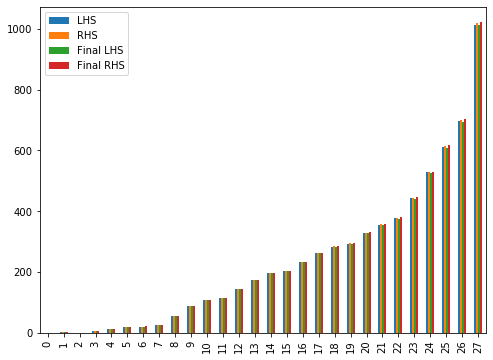

In [9]:
curve = eurusd_fwd_curve.filter(['LHS', 'RHS', 'Final LHS', 'Final RHS'], axis=1)
curve.plot(kind="bar", figsize=[8, 6])

## Swap Length

In [16]:
eurusd_fwd_curve['Date1'] = pd.to_datetime(eurusd_fwd_curve['Date1'])
eurusd_fwd_curve['Date2'] = pd.to_datetime(eurusd_fwd_curve['Date2'])
eurusd_fwd_curve['Swap Length'] = eurusd_fwd_curve['Date2'] - eurusd_fwd_curve['Date1']
eurusd_fwd_curve

,Tenor,Date1,Date2,Days,LHS,RHS,Swap Length
0,ON,2019-02-21,2019-02-22,-4,0.900,0.920,1 days
1,TN,2019-02-22,2019-02-25,-3,2.745,2.765,3 days
2,SN,2019-02-25,2019-02-26,1,0.900,0.940,1 days
3,1W,2019-02-25,2019-03-04,7,6.390,6.490,7 days
4,2W,2019-02-25,2019-03-11,14,12.890,12.990,14 days
5,3W,2019-02-25,2019-03-18,21,19.435,19.535,21 days
6,IMM1,2019-02-25,2019-03-20,23,21.280,21.480,23 days
7,1M,2019-02-25,2019-03-25,28,25.995,26.145,28 days
8,2M,2019-02-25,2019-04-25,59,56.725,56.925,59 days
9,3M,2019-02-25,2019-05-28,92,87.970,88.270,92 days
